# First Draft Viz

Looking at how when people vote affects turnout

In [1]:
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Census demographic and election data

In [2]:
census_with_election = pd.read_csv('census_with_election_data.csv')

Early voting options by state

In [3]:
early = pd.read_csv("Early Voting.csv")

In [4]:
early['voting_difficulty'] = (early['All-Mail Voting']*1.0)+(early['No-Excuse Absentee']*2.0)+(early['Absentee - Excuse Required']*3.0)

In [5]:
early1 = early[['State','voting_difficulty']]

In [6]:
df = census_with_election.merge(early1, left_on= 'state.name', right_on = 'State', how = 'left')

In [7]:
df['voter_turnout'] = df['total_votes']/df['18 years and over']

In [8]:
df['no_excuse']=(df['voting_difficulty']<3)*1.0

Define varibles for portion of workers that are blue collar and white collar

In [9]:
df['bcollar'] = df['Service']+df['Natural resources, construction, and maintenance occupations']+df['Production, transportation, and material moving occupations']

In [10]:
df['wcollar'] = df['Management, business, science, and arts occupations']+df['Sales and office occupations']

(0.4, 0.67163482003567776)

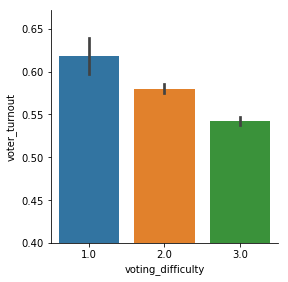

In [11]:
p2 = sns.factorplot(x = 'voting_difficulty', y = 'voter_turnout', data = df, kind = 'bar')
p2.axes[0,0].set_ylim(0.4,)

States with the most flexible voting policies have the highest participation rates.

(0.4, 0.6)

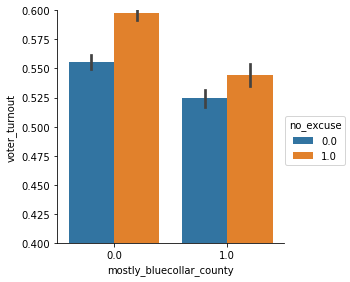

In [12]:
df['mostly_bluecollar_county'] = (df['bcollar']>50.0)*1.0

p1 = sns.factorplot(x = 'mostly_bluecollar_county', y = 'voter_turnout',hue = 'no_excuse', data = df, kind = 'bar')
p1.axes[0,0].set_ylim(0.4,0.6)

In counties with mostly white-collar workers, there is a significant increase in voter turnout in states that don't require an excuse for absentee ballots. Clearly, the current absentee ballot rules help improve voting in affluent counties, but they do not do enough to help blue-collar workers. White collar workers have jobs that usually provide more flexiblity and make it easier to vote. Blue collar workers do not have as much luxury with their time.

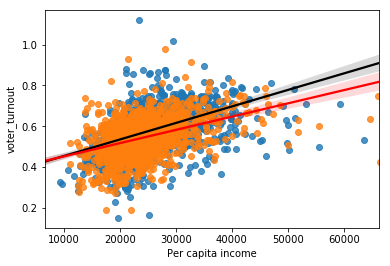

In [13]:
fig, axs = plt.subplots()
sns.regplot(x = "Per capita income", y = 'voter_turnout', data = df[df['no_excuse']==1],line_kws={'color':'black'},ax=axs)
sns.regplot(x = "Per capita income", y = 'voter_turnout', data = df[df['no_excuse']==0],line_kws={'color':'red'},ax=axs)

As we would expect, voter turnout improves with income. In this plot, we see that the more lenient absentee policies have a more significant impact. States that don't require an excuse for an absentee ballot see a steeper rise in voter turnout as income increases. This supports the argument that absentee rules need to be changed to provide more assistance to the lower class.